In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = '^RUI', start = '2012-03-11',end = '2022-07-10')
data.head(10)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^RUI,^RUI,^RUI,^RUI,^RUI,^RUI
Date,,,,,,
2012-03-12 00:00:00+00:00,759.130005,759.130005,760.619995,756.840027,759.429993,0
2012-03-13 00:00:00+00:00,772.979980,772.979980,773.030029,761.450012,761.450012,0
2012-03-14 00:00:00+00:00,771.630005,771.630005,774.679993,769.280029,773.190002,0
2012-03-15 00:00:00+00:00,776.419983,776.419983,776.469971,770.739990,772.380005,0
2012-03-16 00:00:00+00:00,777.130005,777.130005,778.099976,775.640015,776.559998,0
2012-03-19 00:00:00+00:00,780.090027,780.090027,782.549988,776.070007,777.119995,0
2012-03-20 00:00:00+00:00,777.369995,777.369995,778.299988,773.119995,778.030029,0
2012-03-21 00:00:00+00:00,776.150024,776.150024,778.650024,774.760010,777.559998,0


In [3]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

/var/folders/44/5fjpmy5x6kg9yc3gslmc0bww0000gn/T/ipykernel_23555/2358861191.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]
/var/folders/44/5fjpmy5x6kg9yc3gslmc0bww0000gn/T/ipykernel_23555/2358861191.py:16: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)


In [2]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.5/939.5 kB 1.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-cp311-cp311-macosx_11_0_arm64.whl size=263940 sha256=b27a89b42dcc7e84b90a0522b548e2a364c693ca03d7bef214dbf017fdd83bf7
  Stored in directory: /Users/veddarji0108/Library/Caches/pip/wheels/fd/28/34/9ba1363b76703fe35ae8296af28ea74578a41b83544bb9da65
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [10]:
data_set = data.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)
#print(data_set.shape)
#print(data.shape)

#print(type(data_set))

Price,Adj Close,High,Low,Open,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
Ticker,^RUI,^RUI,^RUI,^RUI,,,,,,,


In [11]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [dat
# a.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.69190291 0.52508182 1.         1.         0.68462908 0.86817682
  0.88003111 0.39776956 0.80639854 0.63757618 0.09097899]
 [0.0487789  0.32333839 0.30972807 0.14161442 0.19787397 0.03612928
  0.71819514 0.68453823 1.         1.         0.47539452]
 [0.14765509 0.86736001 0.15198199 0.1189626  0.26070782 0.59844463
  0.57310719 0.31671008 0.06450946 0.         0.78191628]
 [0.96277717 0.1093644  0.77947002 0.7853097  0.24970197 0.5287248
  1.         0.10941135 0.09001897 0.09293472 0.450053  ]
 [0.51446402 0.82053203 0.         0.26257318 0.68581787 0.6442636
  0.30130982 0.         0.00147824 0.29541436 0.        ]
 [1.         1.         0.91995785 0.64270406 0.31328295 0.22771711
  0.63036041 0.94871116 0.95593389 0.96886941 0.98619314]
 [0.93942559 0.94063575 0.25221035 0.68264265 0.         0.
  0.59673358 0.23915786 0.57775224 0.30860413 1.        ]
 [0.78065762 0.74505778 0.95549135 0.06969495 0.55677811 0.04395322
  0.         0.05098482 0.67362138 0.19088857 0.77669645]
 [

In [20]:
#import numpy as np

# Sample data for demonstration
data_set_scaled = np.random.rand(100, 8)  # Replace this with your actual scaled dataset
backcandles = 30
X = []

# Create the data structure with multiple features
for j in range(8):  # Assuming there are 8 features in the dataset
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i-backcandles:i, j])

# Convert X to a numpy array
X = np.array(X)

# Check if X has three dimensions before moving axes
if X.ndim == 3:
    # Move the axis from 0 to 2
    X = np.moveaxis(X, 0, 2)
else:
    print("Error: X does not have the expected 3 dimensions.")

# Define the target variable 'y' using the last column
yi = np.array(data_set_scaled[backcandles:, -1])
y = np.reshape(yi, (len(yi), 1))

# Print the shapes to verify
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (70, 30, 8)
y shape: (70, 1)


In [21]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [22]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

56
(56, 30, 8)
(14, 30, 8)
(56, 1)
(14, 1)
[[7.00584929e-01]
 [9.55339129e-01]
 [2.37903642e-01]
 [7.57901171e-01]
 [8.87359507e-01]
 [5.99801716e-01]
 [5.53302543e-01]
 [2.02309259e-01]
 [4.45820118e-04]
 [1.13330654e-01]
 [4.46727822e-01]
 [7.64315489e-01]
 [8.94434869e-01]
 [7.63561143e-01]
 [7.80798761e-01]
 [4.05615247e-01]
 [2.73818529e-01]
 [1.43183288e-01]
 [4.95148053e-01]
 [4.29638170e-01]
 [3.73186716e-01]
 [3.73139117e-01]
 [3.03236827e-02]
 [2.23052504e-01]
 [5.05058267e-01]
 [3.46754484e-01]
 [1.80802387e-01]
 [8.18631938e-01]
 [7.68868282e-01]
 [3.70504021e-01]
 [5.37257038e-01]
 [9.66824162e-02]
 [3.18992475e-01]
 [3.35718983e-01]
 [9.54990839e-01]
 [2.75845309e-01]
 [3.31874440e-01]
 [8.10422599e-02]
 [8.73463923e-01]
 [9.52130111e-01]
 [3.31567048e-01]
 [7.31560266e-01]
 [9.59030793e-01]
 [8.53148051e-02]
 [4.85817971e-01]
 [7.15292124e-01]
 [7.37990226e-01]
 [4.40304462e-01]
 [4.86691073e-01]
 [8.76081481e-02]
 [8.76368884e-01]
 [9.10394987e-02]
 [2.92186768e-01]
 [3

In [30]:
# pip install keras
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 MB 7.3 MB/s eta 0:00:00:00:0100:01
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
Using cached gast-0.6.0-py3-none-any.whl (21 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [31]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1423 - val_loss: 0.0960
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1019 - val_loss: 0.1003
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1078 - val_loss: 0.0903
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0859 - val_loss: 0.0870
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0796 - val_loss: 0.0902
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0855 - val_loss: 0.0861
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0826 - val_loss: 0.0869
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0844 - val_loss: 0.0886
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0810 - val_loss: 0.0878
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0775 - val_loss: 0.0888
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0808 - val_loss: 0.0870
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0833 - val_loss: 0.0931
Ep

In [32]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[0.5105145] [0.57510301]
[0.48512682] [0.53532498]
[0.4996738] [0.56167417]
[0.48143202] [0.58013101]
[0.45704478] [0.98473479]
[0.43326542] [0.47252]
[0.41587985] [0.56039246]
[0.4287557] [0.64172483]
[0.52946216] [0.45397611]
[0.4287276] [0.37291047]


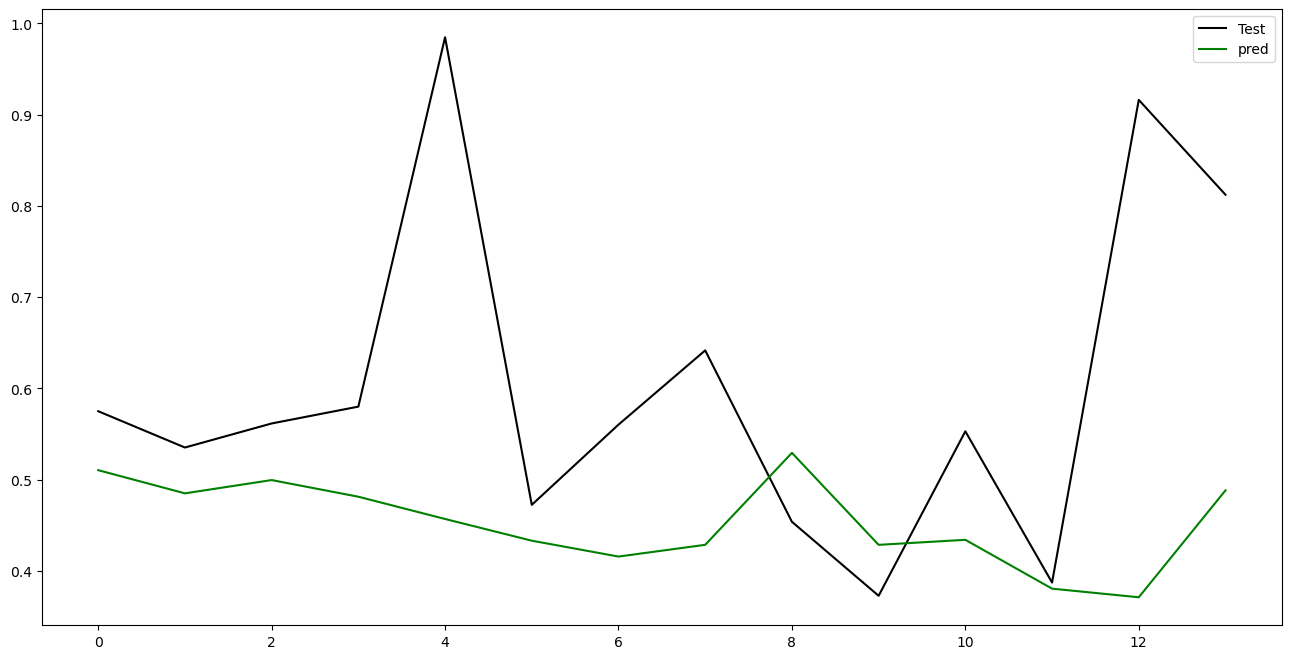

In [33]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()